In [2]:
import matplotlib.pyplot as plt
import numpy as np

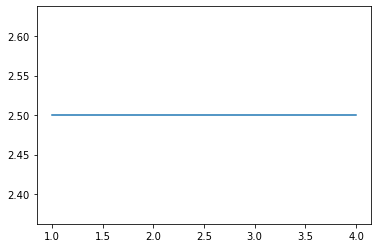

In [13]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [2.5, 2.5, 2.5, 2.5])  # Plot some data on the axes.

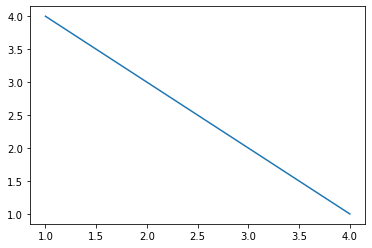

In [14]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [4,3,2,1])

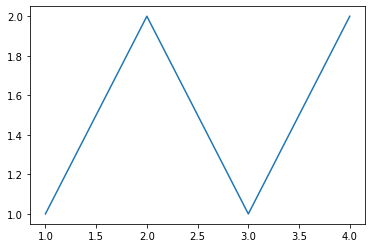

In [15]:
plt.plot([1,2,3,4], [1,2,1,2])

<Figure size 432x288 with 0 Axes>

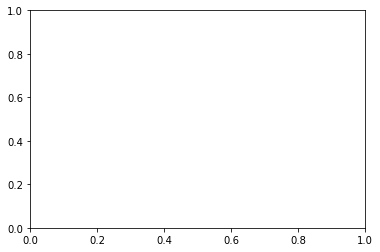

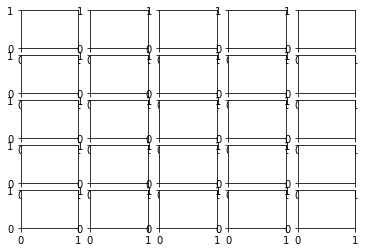

In [20]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes


In [28]:
import pandas

a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values
a_asarray

array([[0.36322621, 0.85347922, 0.84038287, 0.83971875, 0.38431052],
       [0.43180351, 0.78537587, 0.83041146, 0.42214573, 0.58365259],
       [0.13139566, 0.73397007, 0.19946708, 0.92988972, 0.17071552],
       [0.24414855, 0.15604006, 0.49284559, 0.94191323, 0.84189425]])

In [31]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

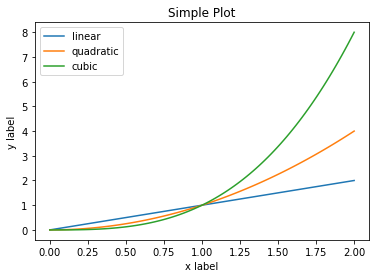

In [32]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

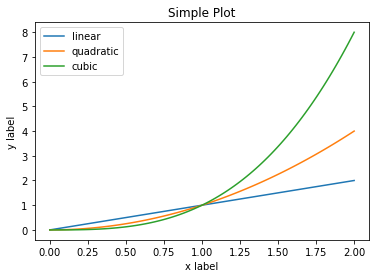

In [33]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

In [61]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

Text(0.5, 1.0, 'H')

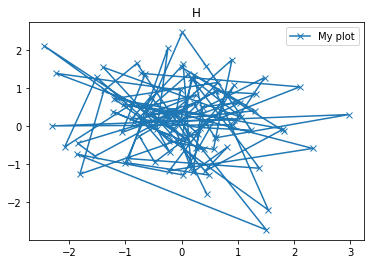

In [62]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1,1)
my_plotter(ax, data1, data2, {'marker': 'x', 'label': 'My plot'}); plt.legend(); plt.title("H")

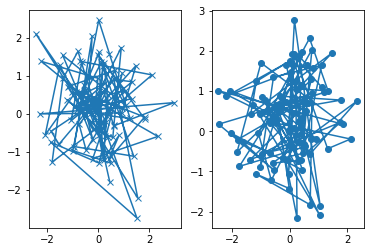

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

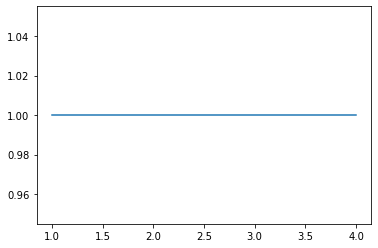

In [64]:
fig, ax = plt.subplots(1,1)
my_plotter(ax, [1,2,3,4], [1,1,1,1], {})

<BarContainer object of 4 artists>

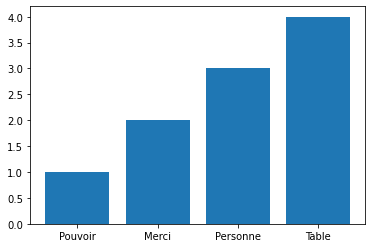

In [95]:
plt.bar(["Pouvoir","Merci","Personne","Table"], [1,2,3,4])

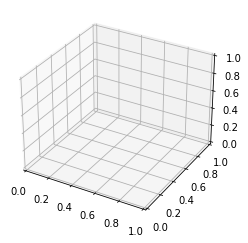

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

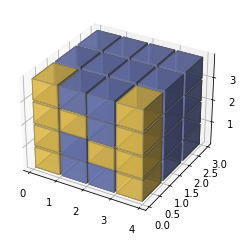

In [104]:
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()

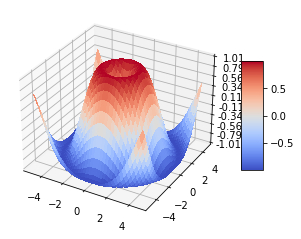

In [105]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [114]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('C:/Users/family/Desktop/mEc/0_Installeur/4_Media/Site-Web/aniverse2.gif')
print(img)

[[[191 192 175 255]
  [200 200 182 255]
  [200 200 182 255]
  ...
  [ 10  10  13 255]
  [ 10   9  12 255]
  [ 10  10  13 255]]

 [[186 188 173 255]
  [198 198 182 255]
  [200 200 182 255]
  ...
  [ 12  12  15 255]
  [ 10  10  13 255]
  [ 10   9  12 255]]

 [[191 192 175 255]
  [200 200 182 255]
  [195 196 179 255]
  ...
  [ 10   9  12 255]
  [ 12  12  15 255]
  [ 10   9  12 255]]

 ...

 [[ 90  95  89 255]
  [107 113 107 255]
  [ 96 104  98 255]
  ...
  [ 10   9  12 255]
  [  8   8  10 255]
  [  8   8  10 255]]

 [[ 90  95  89 255]
  [ 94 100  95 255]
  [ 97 104  99 255]
  ...
  [ 10  10  13 255]
  [ 10  10  13 255]
  [ 10   9  12 255]]

 [[ 90  95  89 255]
  [ 94 100  95 255]
  [ 90  95  89 255]
  ...
  [ 10   9  12 255]
  [  8   8  10 255]
  [  8   8  10 255]]]


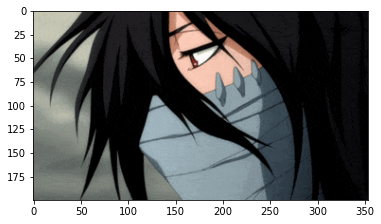

In [115]:
imgplot = plt.imshow(img)


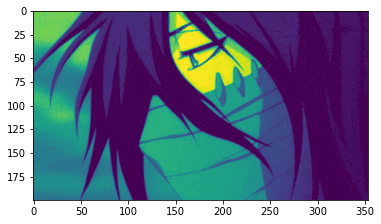

In [116]:
lum_img = img[:, :, 0]

# This is array slicing.  You can read more in the `Numpy tutorial
# <https://docs.scipy.org/doc/numpy/user/quickstart.html>`_.

plt.imshow(lum_img)

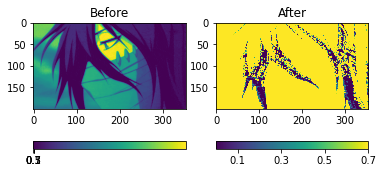

In [117]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

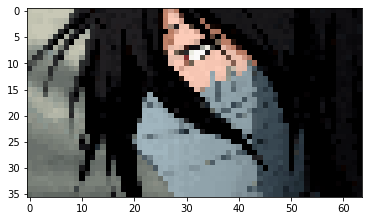

In [119]:
from PIL import Image

img = Image.open('C:/Users/family/Desktop/mEc/0_Installeur/4_Media/Site-Web/aniverse2.gif')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)